# Tanzanian Water Pumps
## Exploratory Data Analysis


## Imports

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

### Data

In [2]:
df = pd.read_csv('../data/raw/X_train.csv')
y_df = pd.read_csv('../data/raw/y_train.csv')

In [3]:
df = df.set_index('id').join(y_df.set_index('id')).reset_index()

In [4]:
df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group    status_group  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Feature Exploration

The Tanzania dataset includes 40 different columns (including a unique 'id' feature). They can be broken into three categories: 
- **Administrative**: Features used by the surveying company, 'GeoData Consultants Ltd'
- **Categorical**: Information that is divided into groups. For example, 'quantity' can be 'enough', 'insufficient', or 'dry'.
- **Non-categorical Numeric**: A range variables expressed as numbers within the set of the Reals, usually varying from negative infinity to positive infinity. For example, 'gps_height' can be any number representing the elevation at a gps coordinate.

### Total List of Features

In [6]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

## Exploration of Target Feature:
### status_group
The target feature in this dataset is the 'status_group' feature. This feature is an indicator of whether or not the water well is 'functional', 'functional needs repairs', or 'non functional'.

| Value | Indicates | Numeric Code | Percent |
|:------|:---------:|-------------:|--------:|
| 'functional' | Is currently working, no repairs needed | 0 | 54% |
| 'functional needs repairs | Currently working, but will stop without repairs | 1 | 7% |
| 'not functional | Not currently working | 2 | 38% |

The 'Tanzanian Ministry of Water' is seeking a better way for identifying pumps that need repairs BEFORE they stop working. Most of the time users of the well are unaware of well maintenance, or that a well will soon become non-functional.

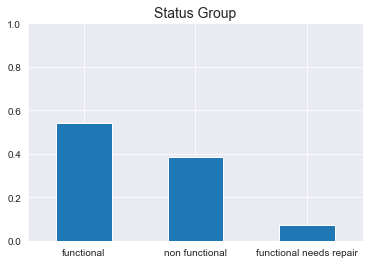

In [7]:
df['status_group'].value_counts(normalize=True).plot.bar(figsize=(6, 4), rot=0)
plt.title('Status Group', fontsize=14)
plt.ylim(0,1);

In [8]:
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

We can use these numbers as a baseline when comparing subgroups. For example, if a region has less than 54% functionality, we know they are below average and some features within that region are effecting the functionality of the wells.

This will help us identify important features more easily, and give us a frame of reference for further data exploration.

In addition, when we identify wells that are above average, we can examine the features that are contributing to this above average behavior, and apply the necessary steps for bringing subpar wells up to the same level of performance.

In [9]:
# create dummies for status group to make plotting easier
dummies_status = pd.get_dummies(df['status_group'])
df = df.join(dummies_status)

## Exploration of Administrative Features:
Administrative features are features that are used by/for the company performing the survey. In the case of our Tanzania Waterwell dataset, the following features can be categorized as administrative:

| Feature Name  | Data Type |
|:--------------|-----------|
| id            | int       |
| date_recorded | date      | 
| recorded_by   | string    |

The 'id' feature contains the unique identification number for each individual waterwell. The 'date_recorded' feature contains the date on which the survey company entered the data into the dataset, and the 'recorded_by' string contains the name of the company responsible for surveying and recording the waterwell statistics. In this dataset the company name is constant accross all wells: 'GeoData Consultants Ltd'.

Because these administrative features are used primarily for creating the dataset, they most likely posess little or no predictive potential.

### id

In [10]:
print(f"The 'id' values range from {df['id'].min()} to {df['id'].max()}")
print(f"Out of {df.shape[0]} total rows, there are {df['id'].nunique()} unique 'id' values ({df.shape[0]/df['id'].nunique()*100}%)")

The 'id' values range from 0 to 74247
Out of 59400 total rows, there are 59400 unique 'id' values (100.0%)


We can assume since the id ranges from 0 to 74,247, there are over 74k different pumps being tracked in Tanzania.

Because 'id' is a unique administrative value there will be no predictive ability gained from using it. 

**Decision**: We will not be using this feature for predictive modeling.

### date_recorded

In [11]:
print(f"This feature: 'date_recorded' spans {df['date_recorded'].nunique()} different unique dates, from 2011 to 2013.")
df['date_recorded'].apply(lambda x: x[:4]).value_counts()

This feature: 'date_recorded' spans 356 different unique dates, from 2011 to 2013.


2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64

Date recorded is used by the survey company to indicate the date the well was recorded. Although one notebook (citation needed) does engineer a feature 'season' based on date_recorded, I don't believe there is a strong argument for doing so, and will not be using this feature for predictive modeling or further analysis.

**Decision**: We will not be using this feature for predictive modeling.

### recorded_by

In [12]:
print(f"This feature contains {df['recorded_by'].nunique()} unique value: {df['recorded_by'][0]}")

This feature contains 1 unique value: GeoData Consultants Ltd


Recorded by keeps track of the company that performed the survey, in the case of this entire dataset: 'GeoData Consultants Ltd'.

Because of the singular nature of this value it will not provide any benefit for predictions, imputation, or feature engineering.

**Decision**: We will not be using this feature for predictive modeling.

## Exploration of Categorical Features:
Categorical features are those features that can be divided into groups. Within the categorical features we can also distinguish further by how many unique groups are contained in each feature. Features with a high amount of unique groups require additional preprocessing before being fed into the predictive modeling process.

In [197]:
import contextily as ctx
import geopandas

# create geopandas frames
gdf = geopandas.GeoDataFrame(
    df.copy(), geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)


# plotting functions for categorical variables
def plot_percent(col):
    """Plot the mean functionalities of pumps compared to 'col'
    
    args:
        col (str): column name
    """
    if df[col].nunique() > 4:
        rows = 3
        cols = 1
        width = df[col].nunique()
        height = 12 + (df[col].nunique() * .25)
    else:
        rows = 1
        cols = 3
        width = 12
        height = 4
    fig, ax = plt.subplots(rows, cols, figsize=(width, height))
        
    for idx, status in enumerate(df['status_group'].unique().tolist()):
        df.groupby(col).mean()[status].plot.bar(ax=ax[idx])
        ax[idx].axhline(y=df[status].mean(), color='r', linestyle='-')
        ax[idx].set_title(f"{status.title()} wells by {col.title()}", fontsize=14)
        ax[idx].set_ylabel('Percent')
        ax[idx].set_xlabel('')
        ax[idx].set_ylim(0,df.groupby(col).mean()[status].max()*1.2);
    fig.tight_layout()
    
# function for plotting pumps with missing values in the specified 'col'
def plot_missing(missing_col, color_col):
    """Plot the missing values from the 'missing_col'.
    
    args:
        missing_col (str): name of column to plot missing values
        color_col (str): name of the column to use as 'hue'
    
    """
    missing_gdf = gdf[gdf[missing_col].isna()]
    wells_ax = missing_gdf.plot(column=color_col, figsize=(10, 10), alpha=0.4, edgecolor='k', legend=True)
    plt.title(f"Location of missing {missing_col}", fontsize=18)
    ctx.add_basemap(wells_ax, source=ctx.providers.Stamen.TerrainBackground)
    wells_ax.set_axis_off()
    
# function for plotting a values
def plot_column(col, num_pts):
    """Plot the given column using random sample of 'num_pts
    
    args: 
        col (str): name of col to plot
        num_pts (int): number of points to sample
    '"""
    wells_ax = gdf[gdf['longitude']>0].sample(num_pts).plot(column=col, figsize=(10, 10), alpha=0.4, edgecolor='k', legend=True)
    plt.title(f"{col.title()}", fontsize=18)
    ctx.add_basemap(wells_ax, source=ctx.providers.Stamen.TerrainBackground)
    wells_ax.set_axis_off()

### funder
The funder is the organization that contributed the money for the construction of the well.

In [14]:
print(f"Unique: {df['funder'].nunique()}")
print(f"Missing: {df['funder'].isna().sum()}/{df.shape[0]}")
print(f"Possible Missing: {(df['funder'] == '0').sum()} (wells with '0' as the value)")
df['funder'].value_counts().head(20)

Unique: 1897
Missing: 3635/59400
Possible Missing: 777 (wells with '0' as the value)


Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [15]:
# within the wells missing 'funder', are there any other missing features?
df[(df['funder'].isna()) | (df['funder'] == '0')].isna().sum().sort_values(ascending=False).head()

funder            3635
installer         3582
scheme_name       2458
permit            2418
public_meeting     631
dtype: int64

The funder category has a large amount of unique values (1,897).

There are also some 'funder's that could be duplicates, such as 'Ces(gmbh)' and 'Ces (gmbh)'.

Some possibilities are cleaning up all the similar/duplicate entries, or using substrings of the values to try and combine closely related values.

**Decision**: Try to strip and lowercase the letters and combine the values, or use 'n' letters and try to combine.

### installer

In [292]:
print(f"Unique: {df['installer'].nunique()}")
print(f"Missing: {df['installer'].})

Unique: 2145


### wpt_name

In [16]:
print(f"Unique: {df['wpt_name'].nunique()}")
print(f"NaN: {df['wpt_name'].isna().sum()}")
print(f"Missing: {(df['wpt_name'] == 'none').sum()}")

Unique: 37400
NaN: 0
Missing: 3563


In [17]:
df['wpt_name'].value_counts()

none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
                         ... 
Kwa Ludigeli Matandaa       1
Masange Kati                1
Songwe                      1
Kwa Florance C Masawe       1
Kwangohe                    1
Name: wpt_name, Length: 37400, dtype: int64

The wpt_name feature indicates the name given to the individual wells. There is a very high cardinality, with 36,400 unique names.

Many of the names include the location of the well, such as 'school', or 'hospital'. There might be a way to translate the names, and then to group them together by the location. Then we could examine the categories for correlation to the functionality of the wells.

**Decision**: Translate into english and then group together by location, i.e all places with school in the name can be binned together as schools.

## Geographical Features
Tanzania is divided into thirty-one regions (mkoa in Swahili). Each region is subdivided into districts (wilaya in Swahili). The districts are sub-divided into divisions (tarafa in Swahili) and further into local wards (kata in Swahili). Wards are further subdivided for management purposes: for urban wards into streets (mtaa in Swahili) and for rural wards into villages (kijiji in Swahili). The villages may be further subdivided into hamlets (vitongoji in Swahili).

In [247]:
print(f"Basins: {df['basin'].nunique()}")
print(f"Region: {df['region'].nunique()}")
print(f"Districts: {df['district_code'].nunique()}")
print(f"LGAs: {df['lga'].nunique()}")
print(f"Wards: {df['ward'].nunique()}")
print(f"Subvillages: {df['subvillage'].nunique()}")

Basins: 9
Districts: 20
Region: 21
LGAs: 125
Wards: 2092
Subvillages: 19287


### basin
The largest geographic subdivision in the dataset.

In [18]:
print(f"Unique: {df['basin'].nunique()}")
print(f"Missing: {df['basin'].isna().sum()}")
print(f"Probably Missing: {(df['basin'] == 0).sum()}")
df['basin'].value_counts()

Unique: 9
Missing: 0
Probably Missing: 0


Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

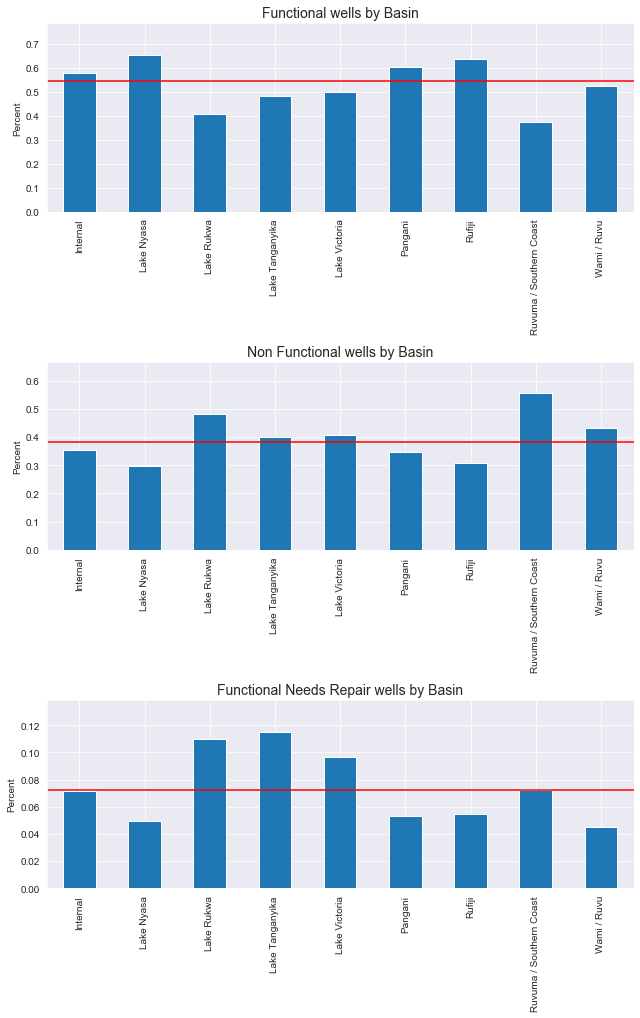

In [19]:
plot_percent('basin')

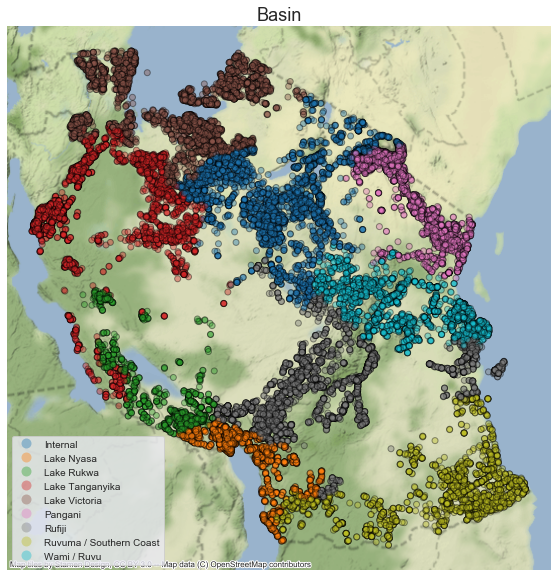

In [212]:
plot_column('basin', 30000)

The 'basin' feature indicates which of the 9 basins in Tanzania that the water well resides.

Out of the 9 basins, 'Lake Rukwa', 'Lake Tanganyika', and 'Lake Victoria' each have an above average amount of wells that are functional but needing repair. This could indicate a problem with the geography, or with the policies used in those specific areas.

### district_code
The district is the 2nd largest geographic subdivision.

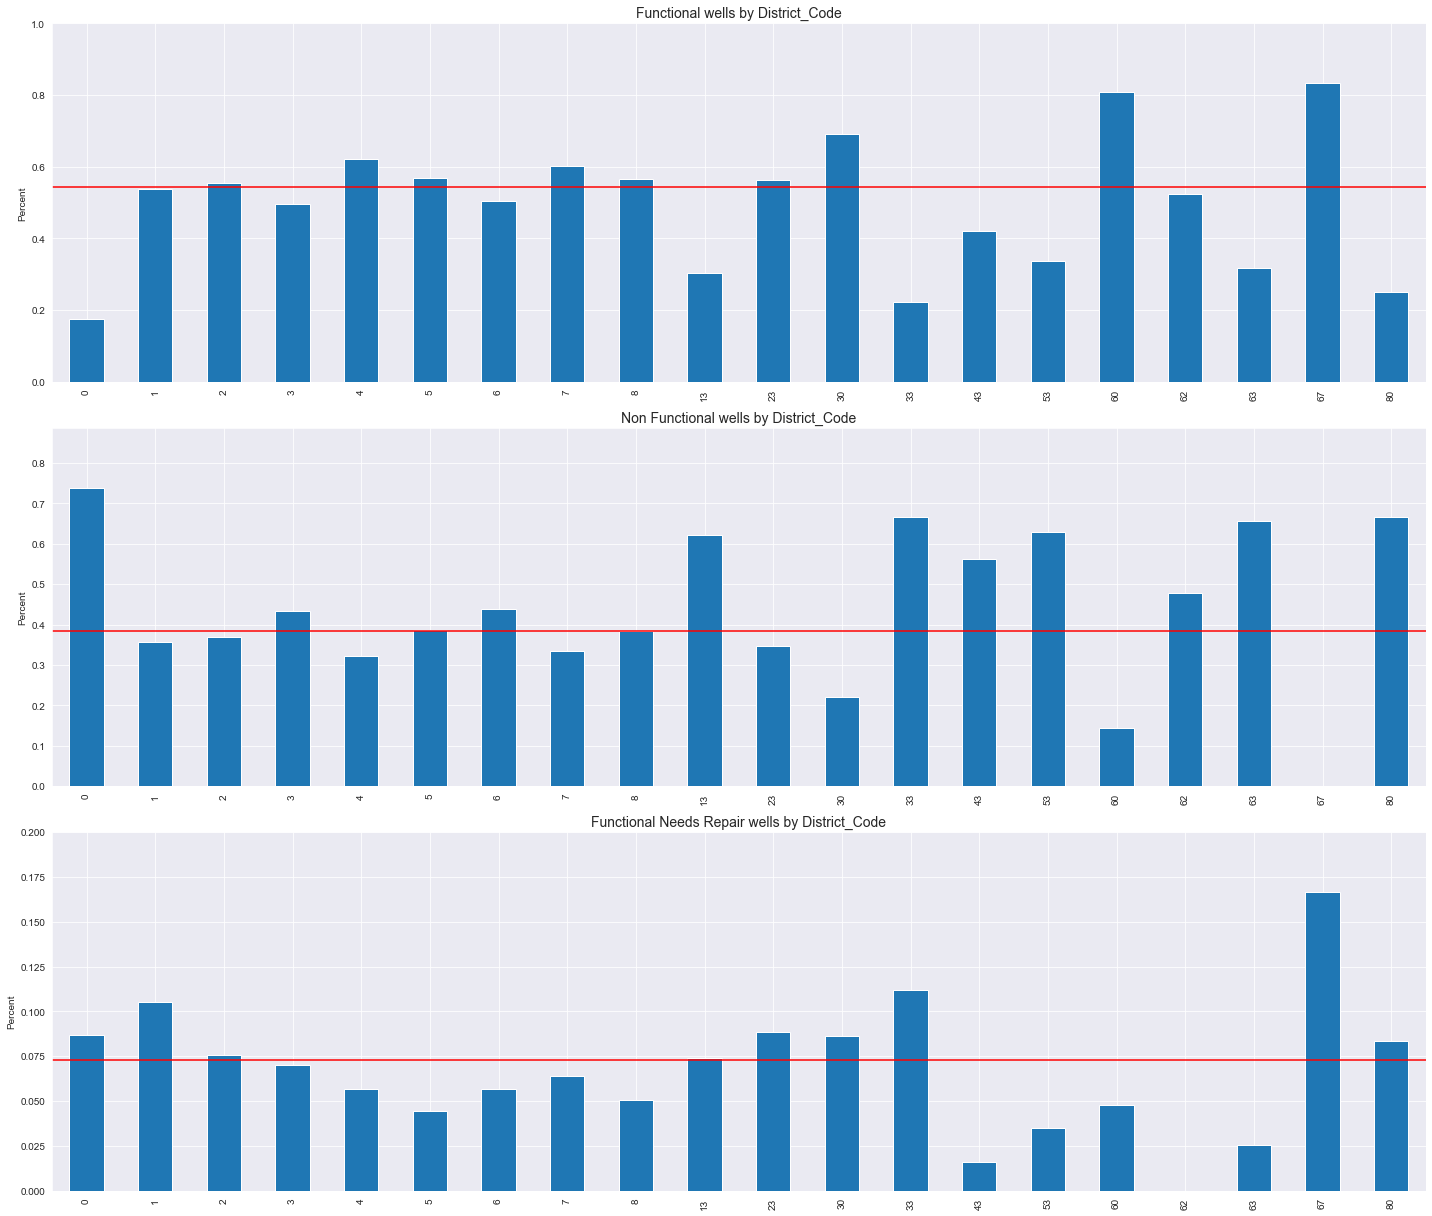

In [26]:
plot_percent('district_code')

### region
Third largest geographic subdivision.

In [291]:
print(f"Unique: {df['region'].nunique()}")
df['region'].value_counts()

Unique: 21


Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

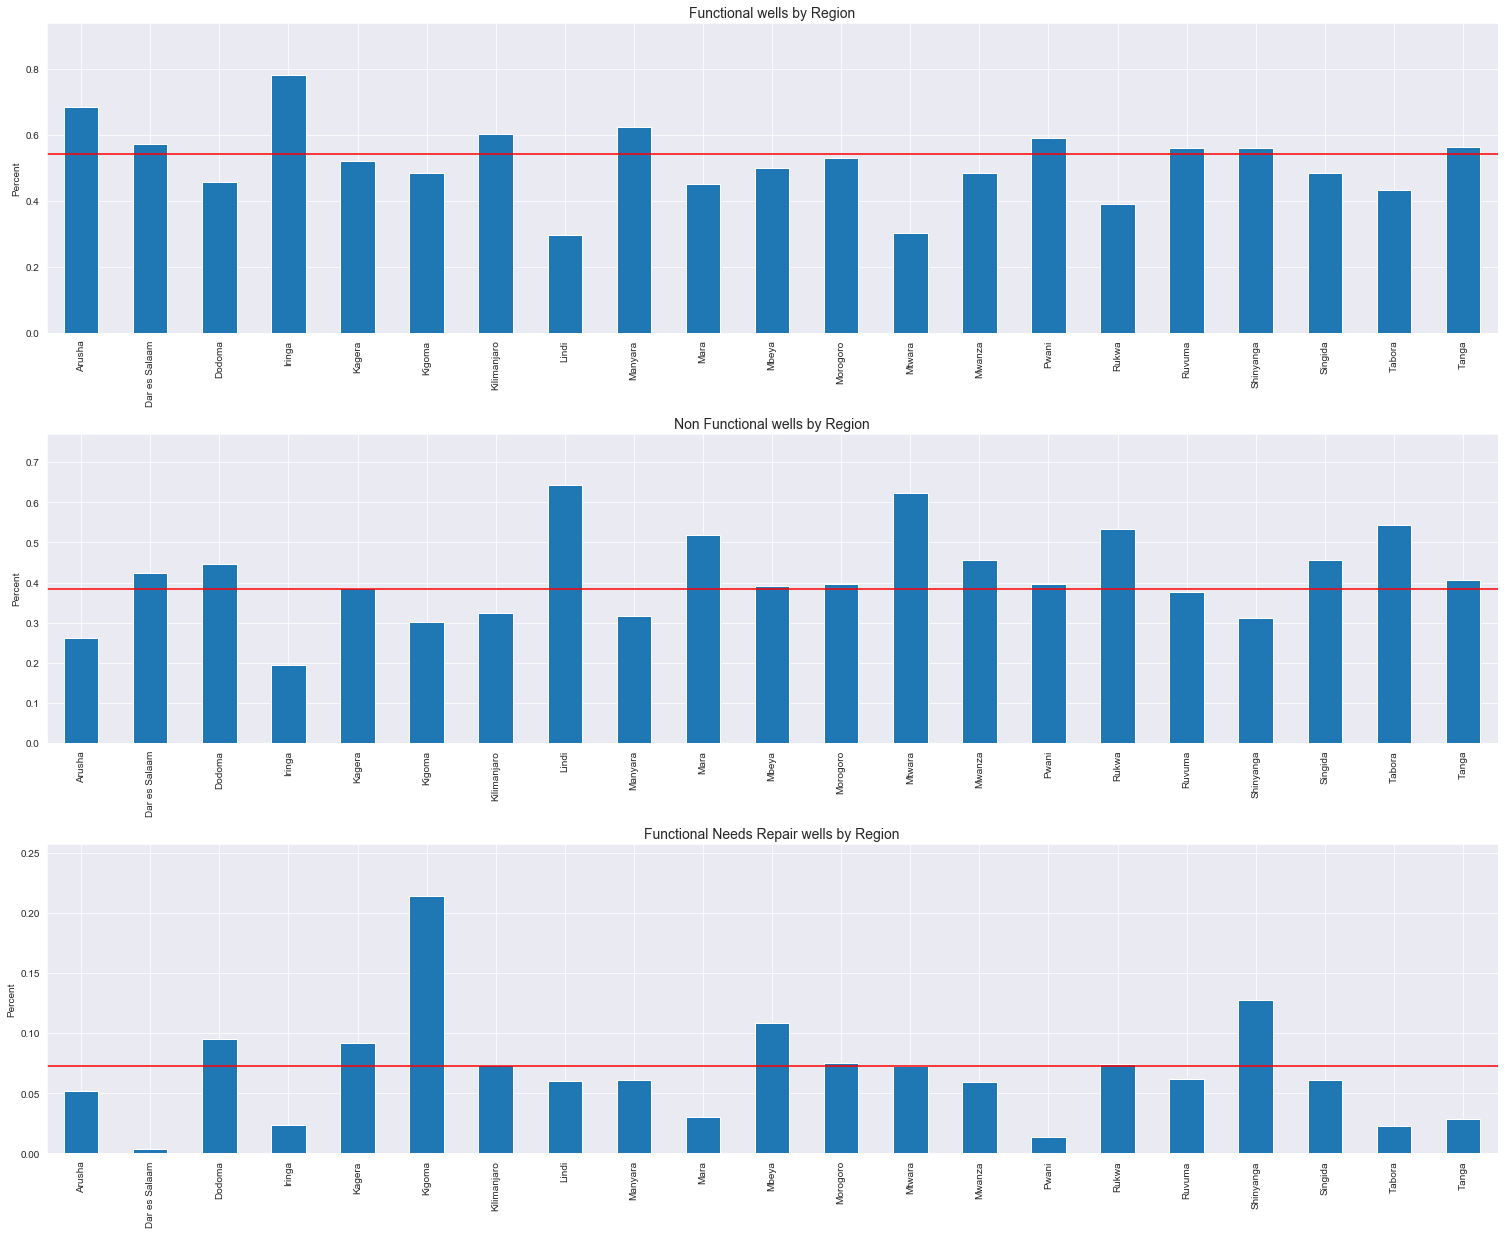

In [22]:
plot_percent('region')

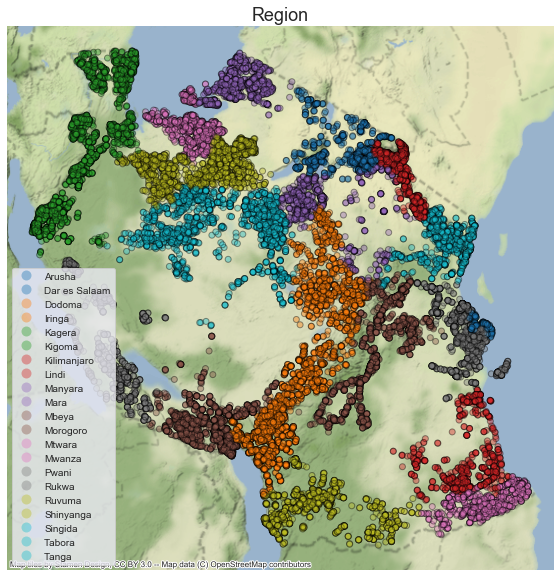

In [207]:
plot_column('region', 30000)

### region_code
Third largest geographic subdivision.

In [252]:
print(f"Unique (region_code): {df['region_code'].nunique()}, Unique (region): {df['region'].nunique()}")
print(f"Missing: {df['region_code'].isna().sum()}")
df['region_code'].value_counts()

Unique (region_code): 27, Unique (region): 21
Missing: 0


11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

There are more region_codes than regions, so we graph them against each other and try to identify whether or not it is an error.

In [287]:
def plot_region_code(region_code, region):
    # function for plotting pumps with missing values in the specified 'col'
    region_code_gdf = gdf[(gdf['region_code'] == region_code) & (gdf['longitude'] > 0)]
    region_gdf = gdf[(gdf['region'] == region) & (gdf['longitude'] > 0)]
#     print(missing_gdf)
    wells_ax = region_code_gdf.plot(figsize=(10, 10), alpha=0.8, edgecolor='k', color='yellow', label='region_code')
    wells_ax = region_gdf.plot(figsize=(10, 10), alpha=0.2, edgecolor='k', ax=wells_ax, color='purple', label='region')
    plt.legend()
    plt.title(f"region_code: {region_code}, region: {region}", fontsize=18)
    ctx.add_basemap(wells_ax, source=ctx.providers.Stamen.TerrainBackground)
    wells_ax.set_axis_off()
    

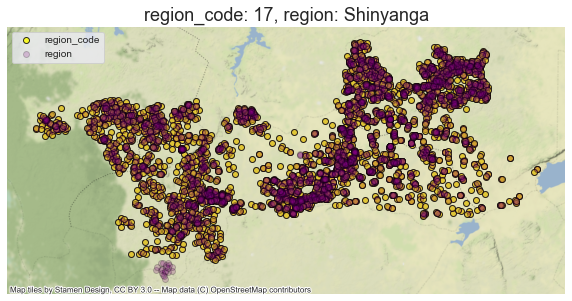

In [288]:
plot_region_code(17, 'Shinyanga')

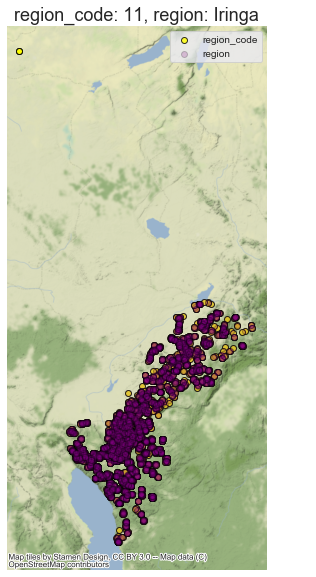

In [289]:
plot_region_code(11, 'Iringa')

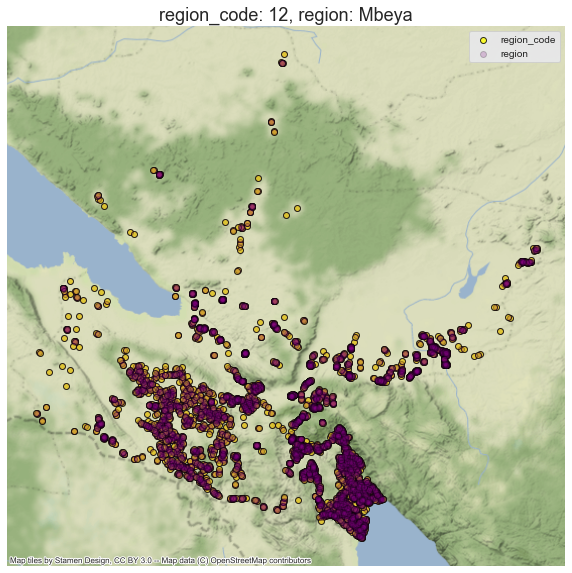

In [290]:
plot_region_code(12, 'Mbeya')

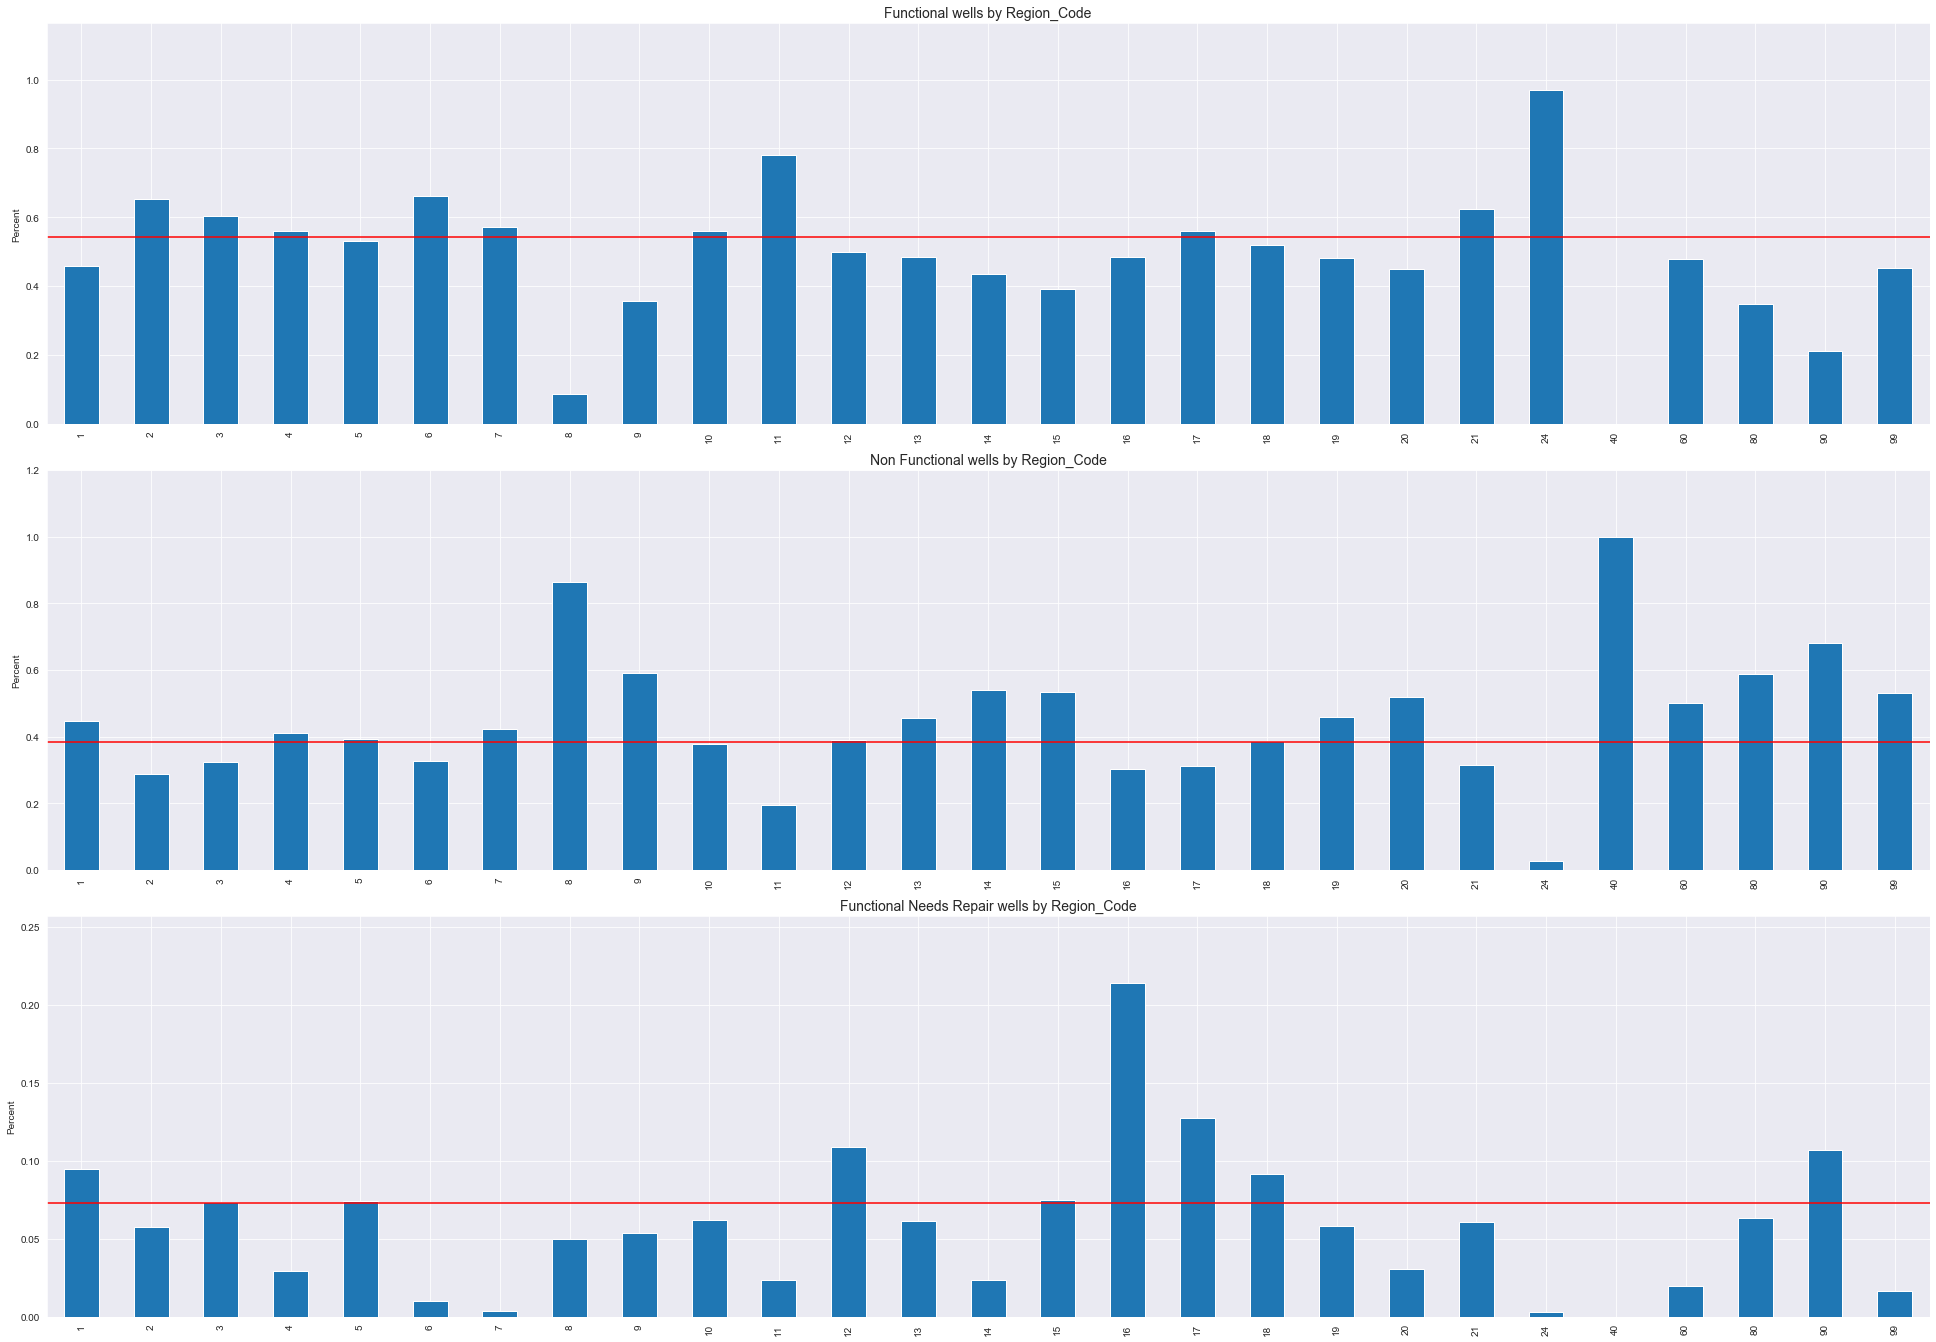

In [24]:
plot_percent('region_code')

Region code is the numeric equivalent of the 'region' columns, except it contains a different amount of unique values.

### lga

In [27]:
df['lga'].nunique()

125

In [226]:
df['lga']

0                Ludewa
1             Serengeti
2             Simanjiro
3              Nanyumbu
4               Karagwe
              ...      
59395               Hai
59396            Njombe
59397           Mbarali
59398          Chamwino
59399    Morogoro Rural
Name: lga, Length: 59400, dtype: object

### subvillage
Subvillage is the smallest of the geographic subdivisions, right underneath 'ward' in terms of hierchy.

In [81]:
print(f"Unique: {df['subvillage'].nunique()}")
print(f"Missing: {df['subvillage'].isna().sum()}")

Unique: 19287
Missing: 371


Out of the 371 missing, is there a certain region that they all belong to?

In [230]:
df[df['subvillage'].isna()]['region'].value_counts()

Dodoma    361
Mwanza     10
Name: region, dtype: int64

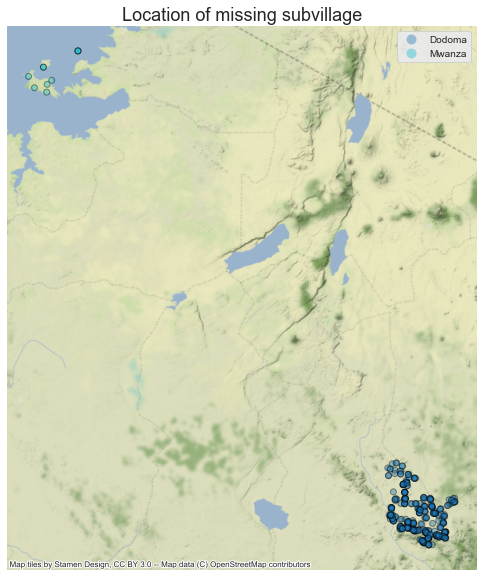

In [231]:
plot_missing('subvillage', 'region')

The missing values come from two different regions, 'Dodoma' and 'Mwanza'. This could be a problem with the data gathering process in that those regions.

In [82]:
df['subvillage'].value_counts()

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Mboga          1
Mzumra         1
Nkoma Juu      1
Elovolosi      1
Mnyakatu       1
Name: subvillage, Length: 19287, dtype: int64

There are a lot of unique values and putting them all into the model without doing any preprocessing such as binning or label encoding would have a negative impact on the accuracy and training time of our models.

If we wanted to impute the missing values we could take the ward which the subvillage belongs to, and assign it to one of that wards' subvillages based on the percent of representation of subvillages within the ward.

After that we would bin the final categories, either by frequency or target response.

**Decision**: Since there are so many values, we should bin this column by frequency. 
- Frequency Binning
- Response Variable Binning

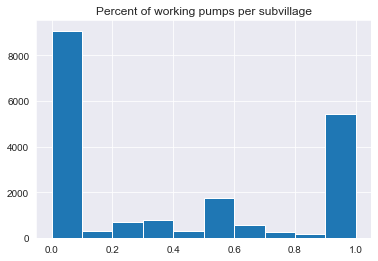

In [114]:
df.groupby('subvillage')['non functional'].mean().sort_values(ascending=False).hist();
plt.title('Percent of working pumps per subvillage');

There seems to be a imbalance with 0 and 1 being over-represented, because of the subvillages that only have 1 pump.

We can try the same thing with a less specific geographic boundary.

### ward

In [169]:
print(f"Unique: {df['ward'].nunique()}")
print(f"Missing: {df['ward'].isna().sum()}")
df['ward'].value_counts()

Unique: 2092
Missing: 0


Igosi          307
Imalinyi       252
Siha Kati      232
Mdandu         231
Nduruma        217
              ... 
Linda            1
Machinjioni      1
Rasbura          1
Themi            1
Kitete           1
Name: ward, Length: 2092, dtype: int64

The 'ward' category is a geographic feature, and is the smallest of the geographic features, similar to a neighborhood.

There are no missing values and the wards are very specific, which means this could possibly be a strong predictor.

**Decision**: Since there are so many different values, we will probably perform one of the binning techniques on it.
- Frequency
- Target

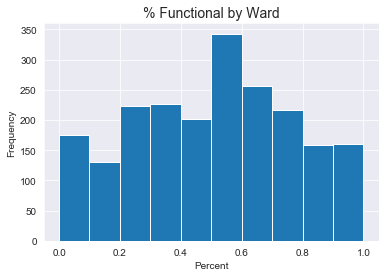

In [183]:
df.groupby(['ward'])['functional'].mean().sort_values(ascending=False).plot.hist()
plt.xlabel('Percent')
plt.title('% Functional by Ward', fontsize=14);

### public_meeting

In [29]:
df['public_meeting'].nunique()

2

In [30]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

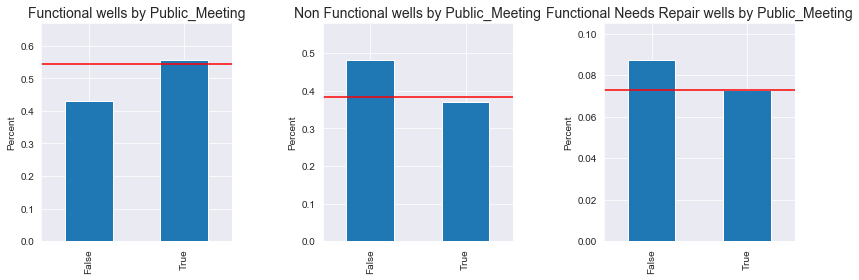

In [31]:
plot_percent('public_meeting')

### scheme_management

In [32]:
df['scheme_management'].nunique()

12

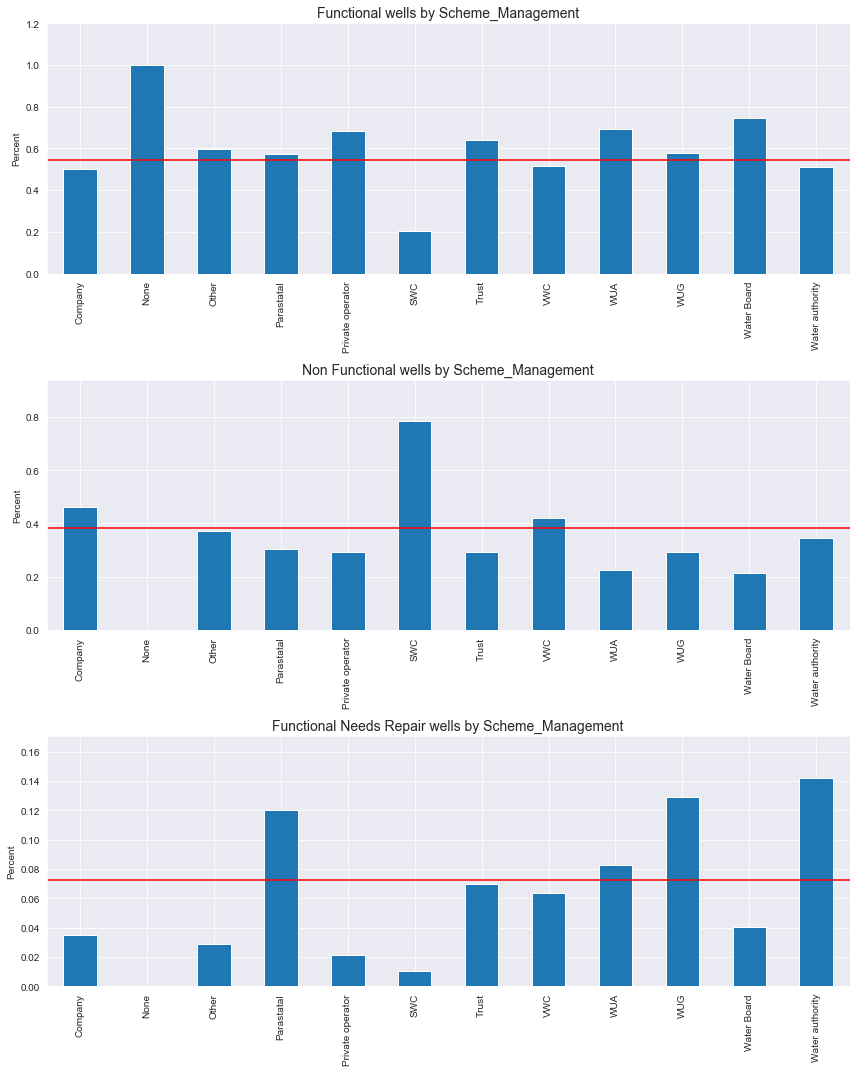

In [33]:
plot_percent('scheme_management')

### scheme_name

In [34]:
df['scheme_name'].nunique()

2696

### permit

In [35]:
df['permit'].nunique()

2

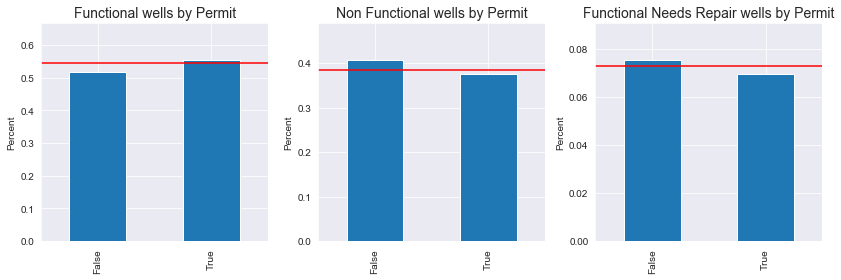

In [36]:
plot_percent('permit')

### extraction_type

In [37]:
df['extraction_type'].nunique()

18

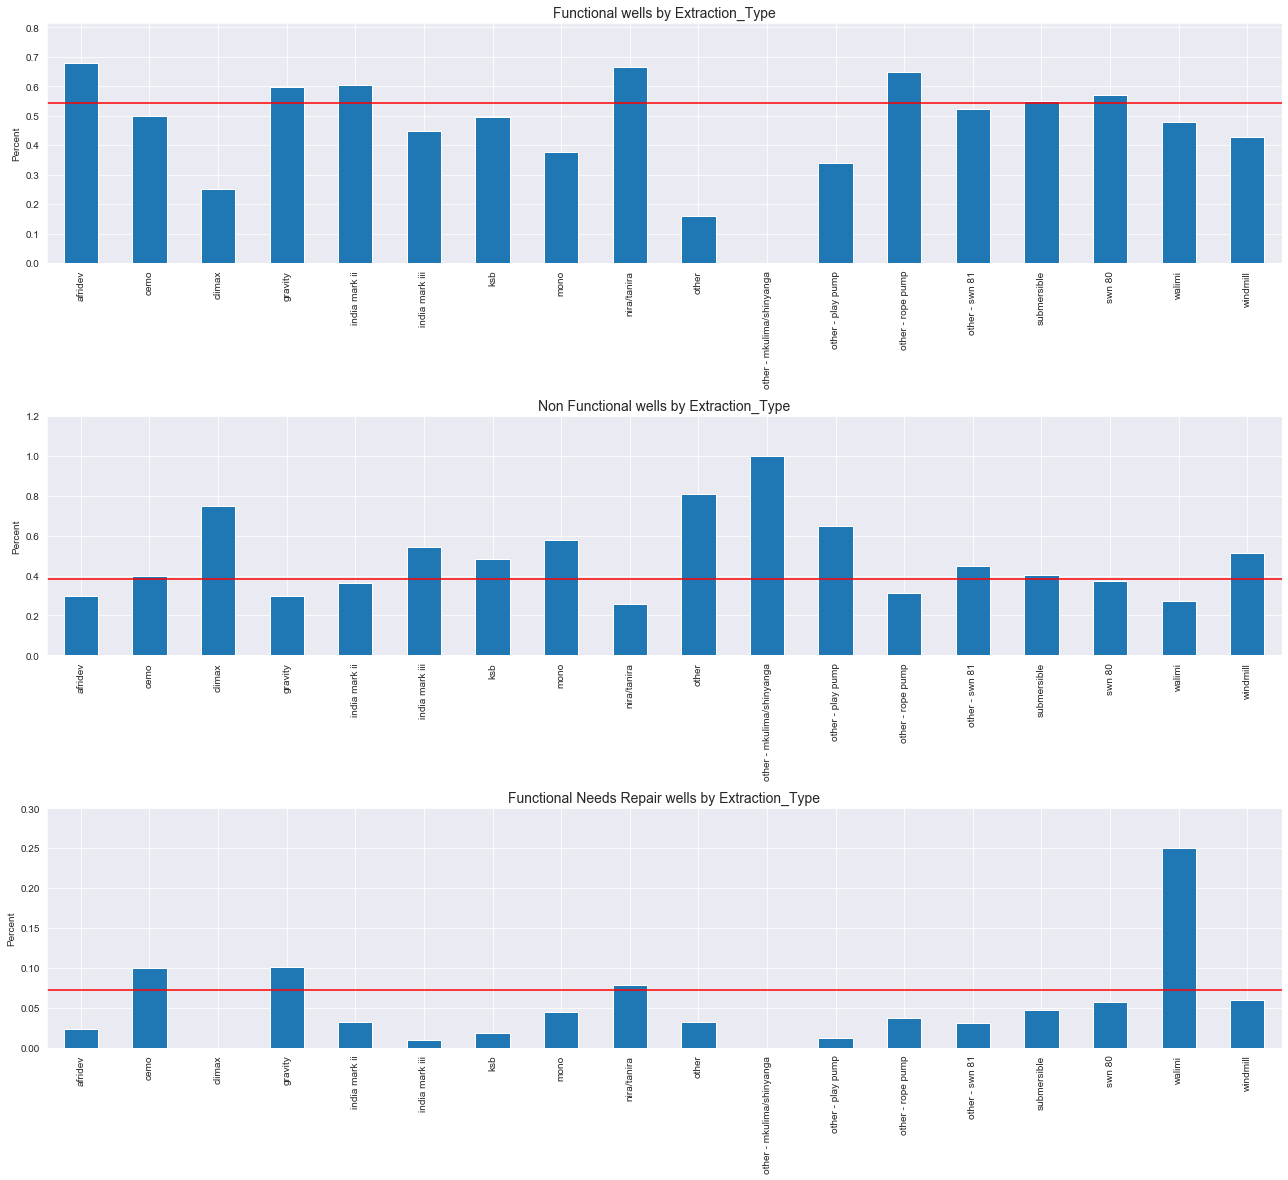

In [38]:
plot_percent('extraction_type')

### extraction_type_group

In [39]:
df['extraction_type_group'].nunique()

13

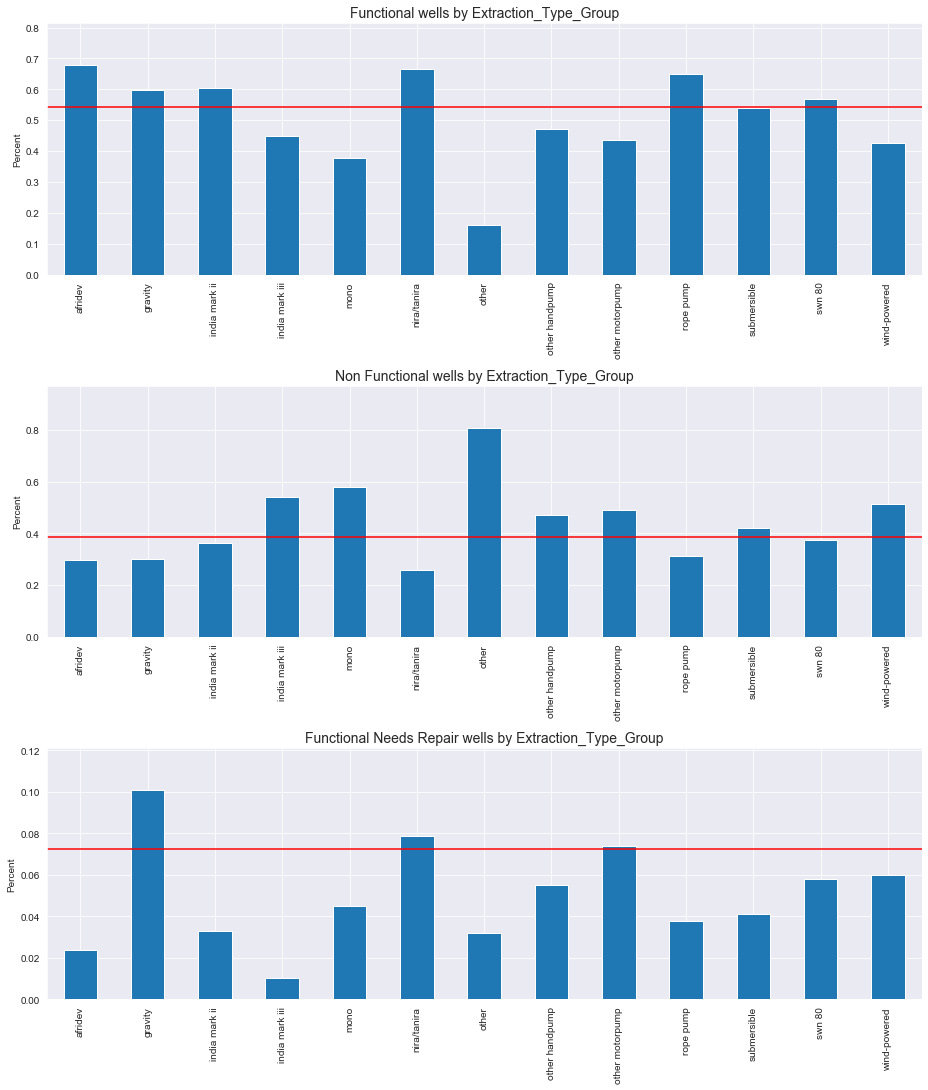

In [40]:
plot_percent('extraction_type_group')

### payment

In [41]:
df['payment'].nunique()

7

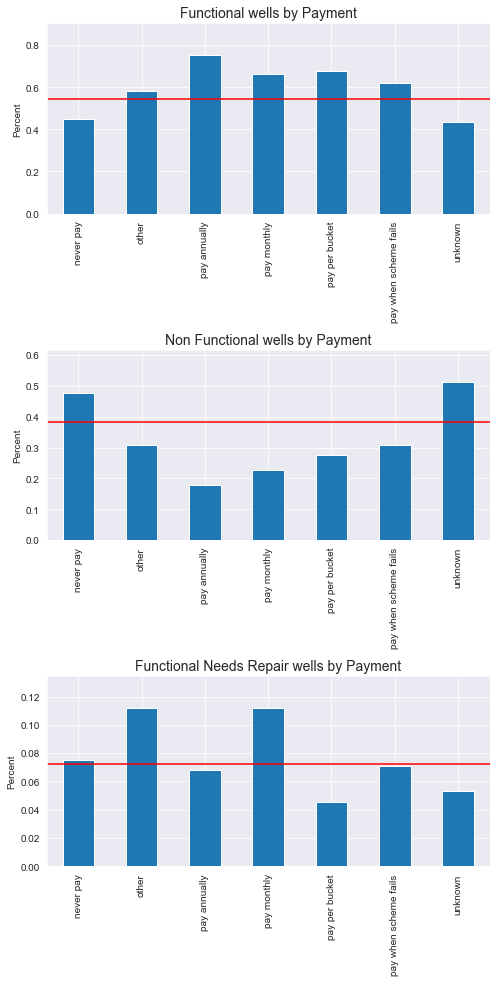

In [42]:
plot_percent('payment')

### payment_type

Same as 'payment'

### water_quality

In [43]:
df['water_quality'].nunique()

8

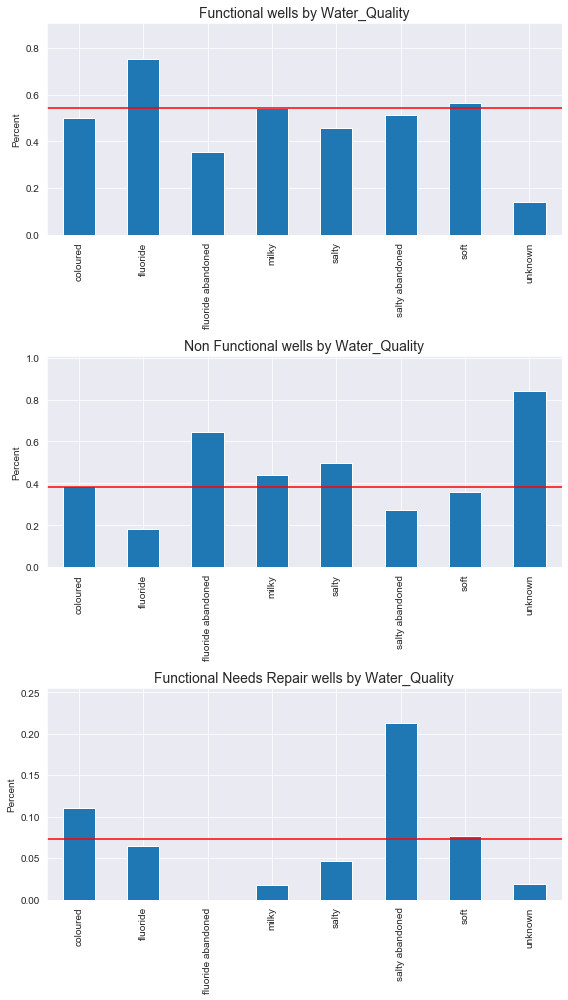

In [44]:
plot_percent('water_quality')

### quality_group

In [45]:
df['quality_group'].nunique()

6

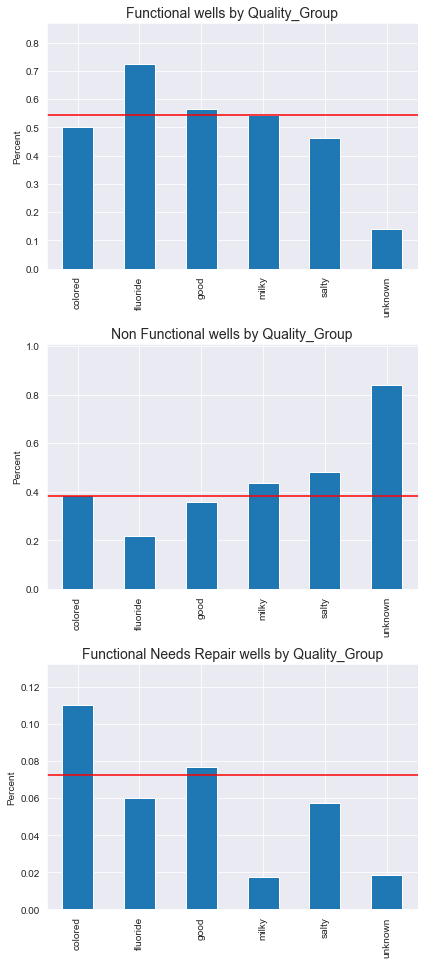

In [46]:
plot_percent('quality_group')

### quantity_group

In [47]:
df['quantity_group'].nunique()

5

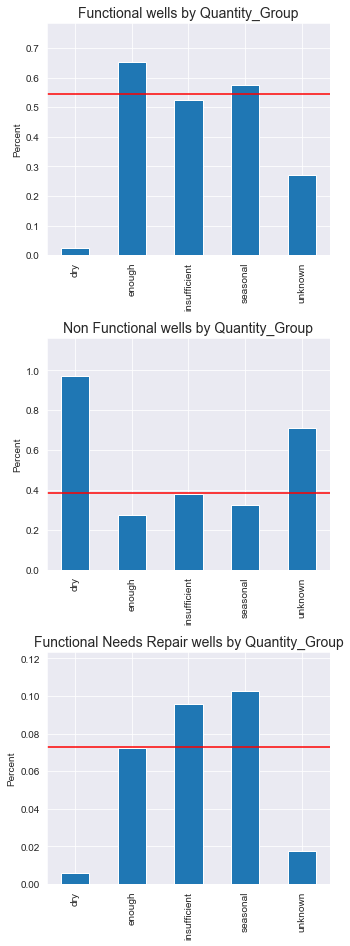

In [48]:
plot_percent('quantity_group')

### quantity

In [49]:
df['quantity'].nunique()

5

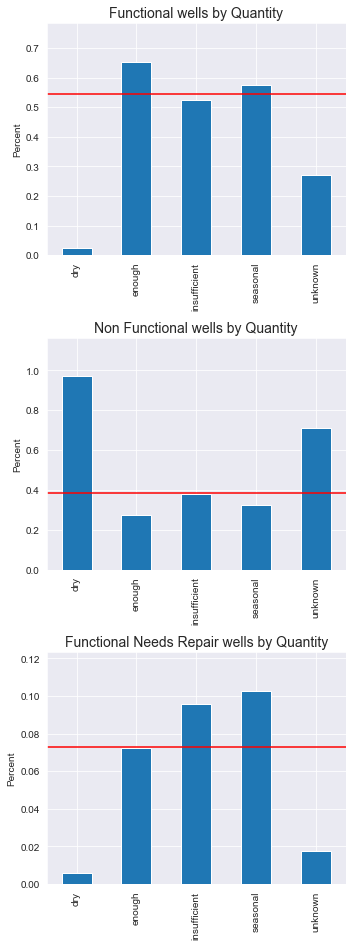

In [50]:
plot_percent('quantity')

### source

In [51]:
df['source'].nunique()

10

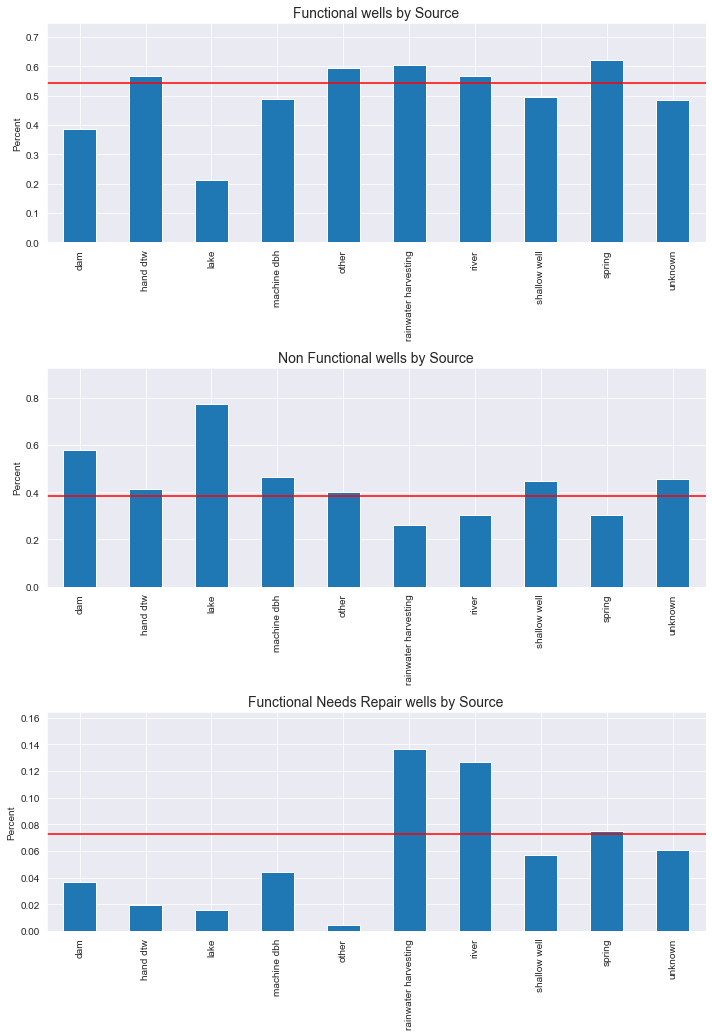

In [52]:
plot_percent('source')

### source_type

In [53]:
df['source_type'].nunique()

7

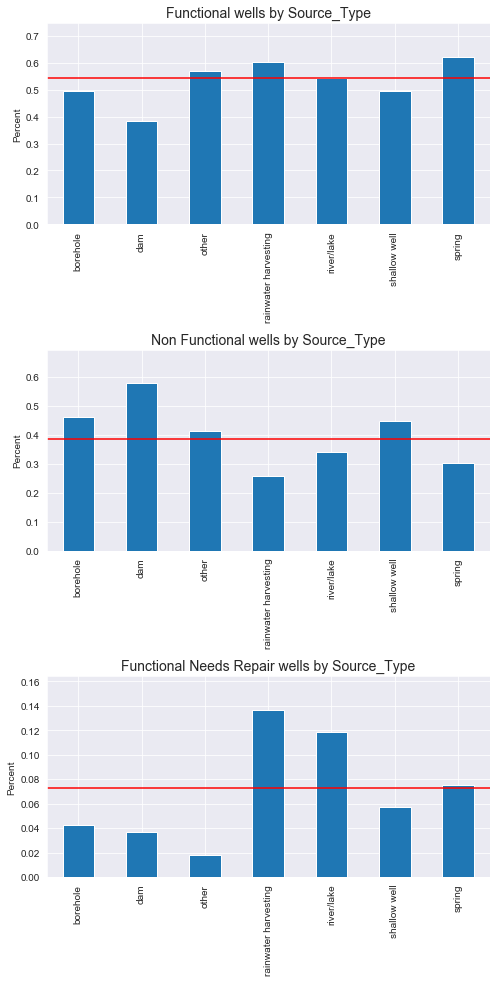

In [54]:
plot_percent('source_type')

### source_class

In [55]:
df['source_class'].nunique()

3

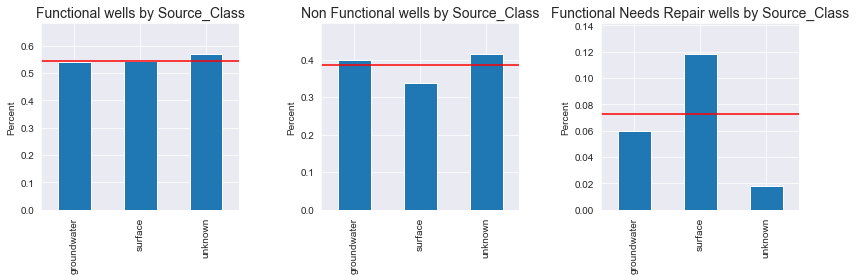

In [56]:
plot_percent('source_class')

### waterpoint_type

In [57]:
df['waterpoint_type'].nunique()

7

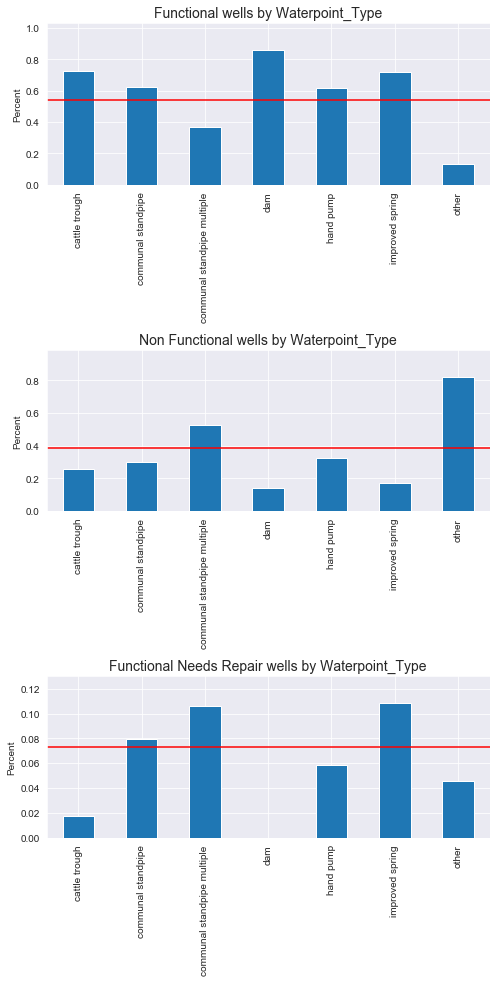

In [58]:
plot_percent('waterpoint_type')

### waterpoint_type_group

In [59]:
df['waterpoint_type_group'].nunique()

6

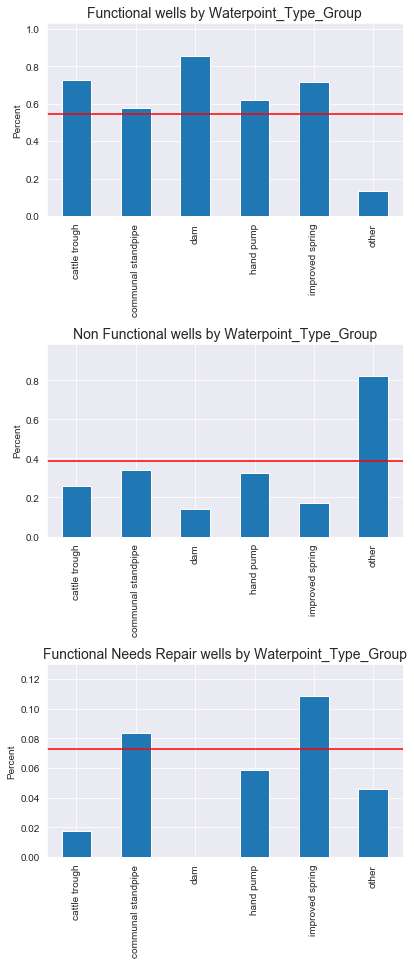

In [60]:
plot_percent('waterpoint_type_group')

## Non-categorical Numerical:

### construction_year

### amount_tsh

### gps_height

### longitude

### latitude

### num_private

### population

## Visualize Map

In [61]:
import contextily as ctx
import geopandas

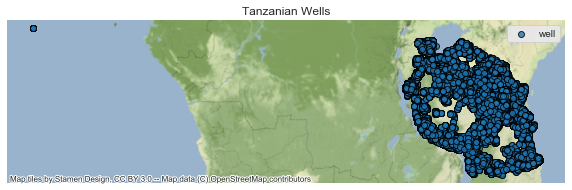

In [62]:
# create geopandas frames
gdf = geopandas.GeoDataFrame(
    df.copy(), geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

# map the features using their geo coordinates
all_wells = gdf.plot(figsize=(10, 10), alpha=0.8, edgecolor='k', label='well')
plt.title('Tanzanian Wells')
plt.legend()
ctx.add_basemap(all_wells, source=ctx.providers.Stamen.TerrainBackground)
all_wells.set_axis_off()

WOW outliers. Some of the columns have missing coordinates.

In [63]:
gdf = gdf[gdf['longitude'] != 0]

### Wells by Status

In [67]:
functional_gdf = gdf[gdf['functional'] == 1]
non_functional_gdf = gdf[gdf['functional needs repair'] == 1]
needs_repair_gdf = gdf[gdf['non functional'] == 1]

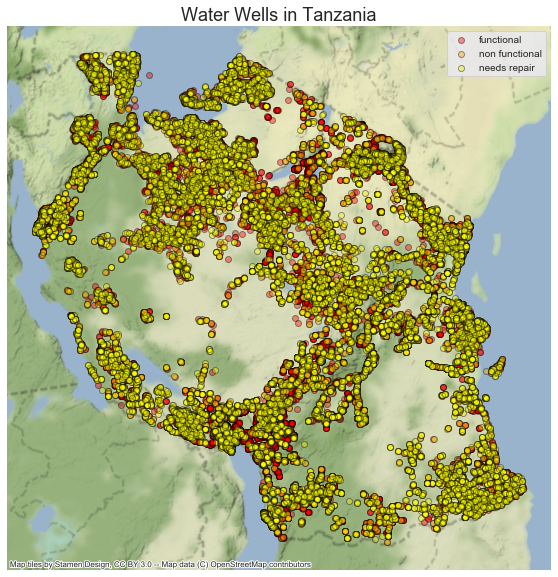

In [68]:
# map the features using their geo coordinates
wells_ax = functional_gdf.plot(figsize=(10, 10), alpha=0.4, edgecolor='k', label='functional', color='red')
wells_ax = non_functional_gdf.plot(ax=wells_ax, figsize=(10, 10), alpha=0.4, edgecolor='k', label='non functional', color='orange')
wells_ax = needs_repair_gdf.plot(ax=wells_ax, figsize=(10, 10), alpha=0.4, edgecolor='k', label='needs repair', color='yellow')

# use basemap that has lat and long
plt.legend()
plt.title('Water Wells in Tanzania', fontsize=18)
ctx.add_basemap(wells_ax, source=ctx.providers.Stamen.TerrainBackground)
wells_ax.set_axis_off()

### Wells by Year

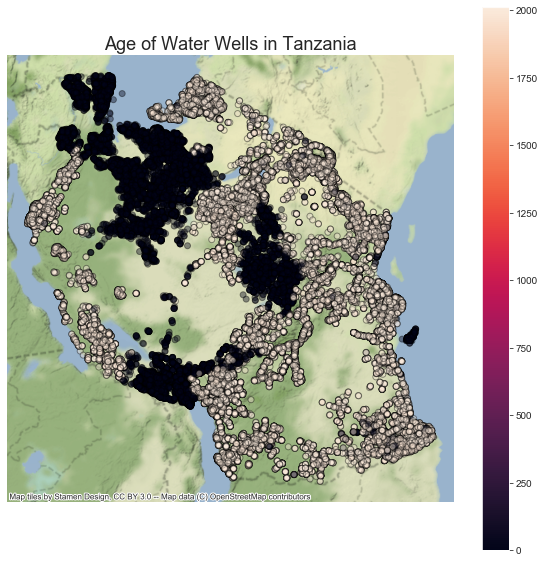

In [70]:
# map the features using their geo coordinates

# add in age indicator
wells_ax = gdf.plot(column='construction_year', figsize=(10, 10), alpha=0.4, edgecolor='k', legend=True)
plt.title('Age of Water Wells in Tanzania', fontsize=18)
ctx.add_basemap(wells_ax, source=ctx.providers.Stamen.TerrainBackground)
wells_ax.set_axis_off()